# Support Vector Machines: Lab 2 

## Import Packages

In [438]:
from cvxopt.solvers import qp
from cvxopt.base import matrix
import numpy, pylab, random, math

## Generate Data

In [439]:
numpy.random.seed(100)
random.seed(100)

classA = [(random.normalvariate(-1.5,1),
           random.normalvariate(0.5,1),
           1.0)
           for i in range(5)] + \
         [(random.normalvariate(1.5,1),
           random.normalvariate(0.5,1),
           1.0)
           for i in range(5)]

classB = [(random.normalvariate(0.0,0.5),
           random.normalvariate(-0.5,0.5),
           -1.0)
           for i in range(10)]

data = classA + classB
random.shuffle(data)

## Define Kernel Functions

In [440]:
usedKernel = "sig"
C = 5

def linearKernel(xi, xj):
    return (numpy.dot(xi[:2],xj[:2]) + 1)

def polynomialKernel(xi,xj):
    p = 3
    return (numpy.dot(xi[:2],xj[:2]) + 1)**p
    #return linearKernel(xi,xj)**p

def radialKernel(xi,xj):
    sigma = 5
    return math.exp(-pow(numpy.linalg.norm(xi[:2]-xj[:2]),2)/(2*pow(sigma,2)))

def sigmoidKernel(xi,xj):
    k = 0.1
    delta = 0
    return math.tanh(numpy.dot(k*xi[:2],xj[:2]) - delta)

def kernelFn(xi,xj,kernelName):
    if kernelName == "lin":
        return linearKernel(xi,xj)
    elif kernelName == "pol":
        return polynomialKernel(xi,xj)
    elif kernelName == "rad":
        return radialKernel(xi,xj)
    elif kernelName == "sig":
        return sigmoidKernel(xi,xj)
    else:
        print("Type in a valid kernel name")
        

## Build P Matrix 

In [441]:
def initializeP(data):
    dimSize = len(data)
    P = numpy.empty((dimSize,dimSize))
    for i in range(dimSize):
        for j in range(dimSize):
            P[i][j] = data[i][2]*data[j][2]*kernelFn(numpy.array(data[i]),numpy.array(data[j]),usedKernel)
    return P


## Indicator Function

In [442]:
def indicator(xStar,alpha):
    sum = 0
    for i in range(len(alpha)):
        xi = numpy.array(alpha[i][1])
        sum += alpha[i][0]*xi[2]*kernelFn(xStar,xi,usedKernel)
    return sum


## Initialize q, G, h

In [443]:
P = initializeP(data)
G = numpy.identity(len(data)) * -1
G = numpy.concatenate((G,numpy.identity(len(data))), axis=0)
q = numpy.empty(len(data))
q.fill(-1)
q.transpose()
h = numpy.concatenate((numpy.zeros(len(data)), numpy.full((len(data),),C)), axis=0)


## Call to qp and pick out non-zero alpha values

In [444]:
r = qp(matrix(P), matrix(q), matrix(G), matrix(h))
alpha = list(r['x'])
alpha = numpy.array(alpha)
 

result = [(alpha[i],data[i]) for i in range(len(data)) if alpha[i]>0.00001]
# print("result:",result)

     pcost       dcost       gap    pres   dres
 0: -2.7605e+01 -2.3687e+02  2e+02  1e-17  9e-16
 1: -4.0051e+01 -6.5894e+01  3e+01  2e-16  7e-16
 2: -4.8281e+01 -6.2294e+01  1e+01  2e-16  5e-16
 3: -5.2828e+01 -5.7369e+01  5e+00  2e-16  5e-16
 4: -5.4000e+01 -5.6209e+01  2e+00  2e-16  6e-16
 5: -5.4721e+01 -5.5144e+01  4e-01  2e-16  5e-16
 6: -5.4906e+01 -5.4924e+01  2e-02  2e-16  5e-16
 7: -5.4915e+01 -5.4915e+01  5e-04  2e-16  5e-16
 8: -5.4915e+01 -5.4915e+01  1e-05  2e-16  7e-16
Optimal solution found.


## Plot Data

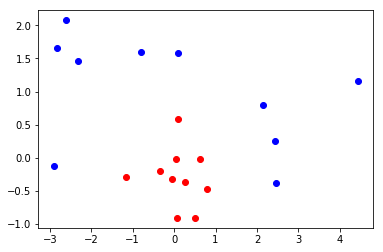

In [18]:
pylab.plot([p[0] for p in classA],
           [p[1] for p in classA],
           'bo')
pylab.plot([p[0] for p in classB],
           [p[1] for p in classB],
           'ro')
pylab.show()

## Plot Decision Boundary

In [9]:
def plotBound(): 
    pylab.plot([p[0] for p in classA],
           [p[1] for p in classA],
           'bo')
    pylab.plot([p[0] for p in classB],
               [p[1] for p in classB],
               'ro')

    pylab.plot([p[1][0] for p in result if p[1] in classA],
               [p[1][1] for p in result if p[1] in classA],
               'bs')
    pylab.plot([p[1][0] for p in result if p[1] in classB],
               [p[1][1] for p in result if p[1] in classB],
               'rs')

    xrange=numpy.arange(-4, 4, 0.05)
    yrange=numpy.arange(-4, 4, 0.05)
    grid=matrix([[indicator(numpy.array([x, y]),result)
                for y in yrange ]
                for x in xrange ])
    pylab.contour(xrange, yrange, grid,
                    (-1.0, 0.0, 1.0),
                    colors=('red', 'black', 'blue'),
                    linewidths=(1, 3, 1))
    pylab.show()

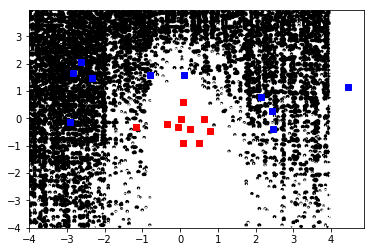

In [26]:
plotBound()

### Linear separator is not successful! 

# With other kernels

## Polynomial (Degree 2)

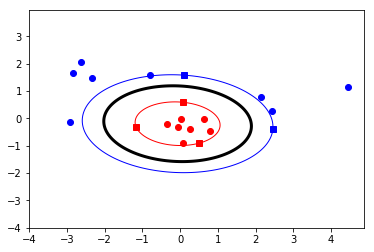

In [32]:
plotBound()

## Radial (Sigma = 100)

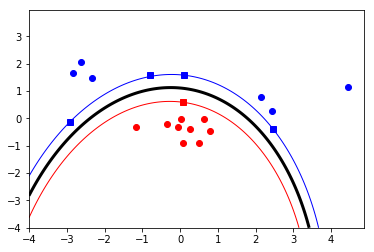

In [38]:
plotBound()

## Sigmoid

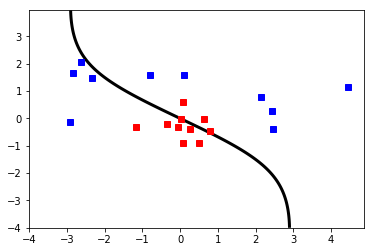

In [18]:
plotBound()

### Sigmoid kernel not successful!

# Easier Data Set

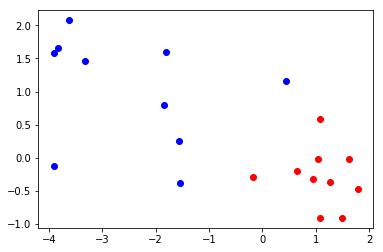

In [29]:
pylab.plot([p[0] for p in classA],
           [p[1] for p in classA],
           'bo')
pylab.plot([p[0] for p in classB],
           [p[1] for p in classB],
           'ro')
pylab.show()

## Linear

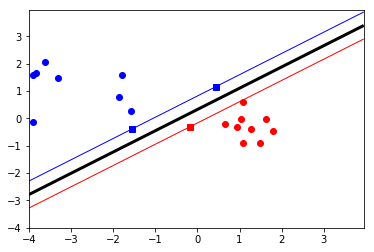

In [38]:
plotBound()

## Polynomial (degree 3)

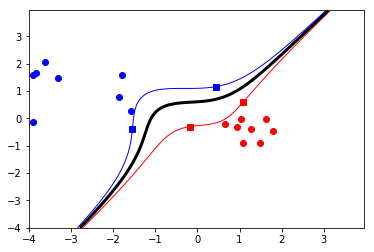

In [54]:
plotBound()

## Radial (Sigma= 5)

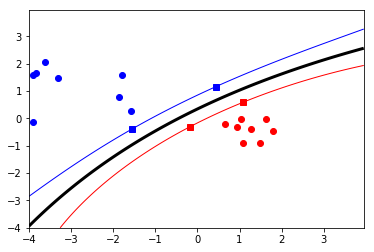

In [62]:
plotBound()

## Sigmoid (k=.1, delta=-1)

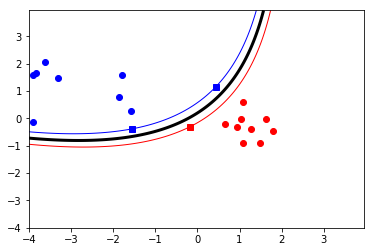

In [100]:
plotBound()

# Harder Dataset

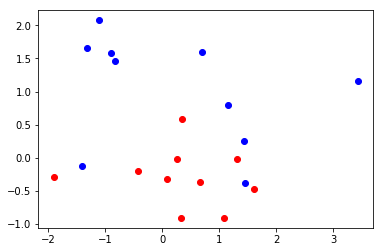

In [157]:
pylab.plot([p[0] for p in classA],
           [p[1] for p in classA],
           'bo')
pylab.plot([p[0] for p in classB],
           [p[1] for p in classB],
           'ro')
pylab.show()

## Polynomial (degree 4)

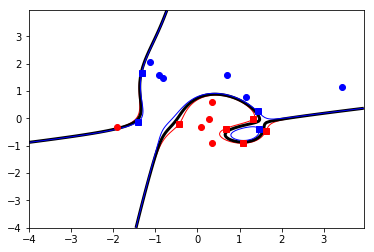

In [165]:
plotBound()

## Radial

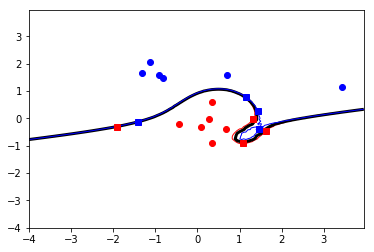

In [180]:
plotBound()

### No Solution found

# With Slack Variables

## Linear with C = 0.05

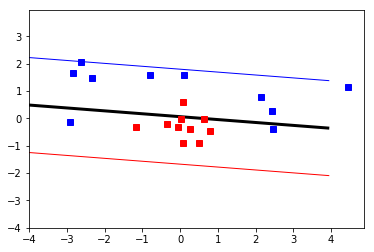

In [188]:
plotBound()

## Linear with C = 100

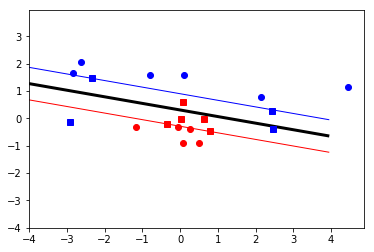

In [212]:
plotBound()

## Polynomial degree 3 with C = .1

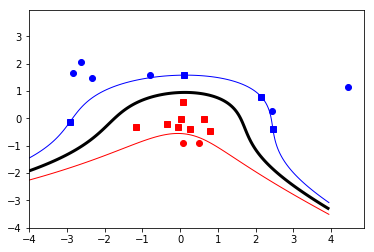

In [236]:
plotBound()

## Polynomial degree 3 with C = 50

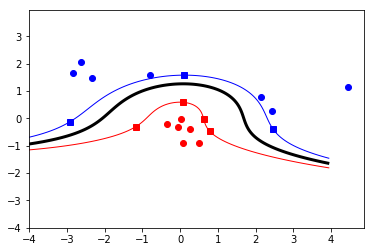

In [244]:
plotBound()

## Radial with sigma = 1 and C = 1

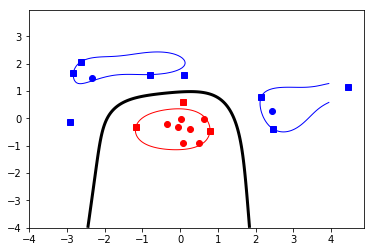

In [308]:
plotBound()

## Radial with sigma = 5 and C = 50

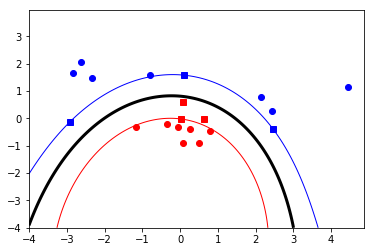

In [316]:
plotBound()

## Sigmoid with k = 0.2, delta = -2, and C = 1

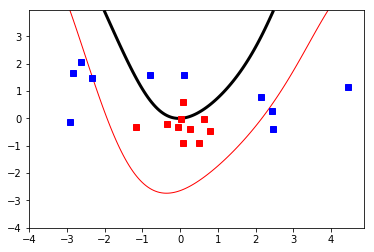

In [324]:
plotBound()

## Sigmoid with k = 0.1, delta = 0, and C = 5

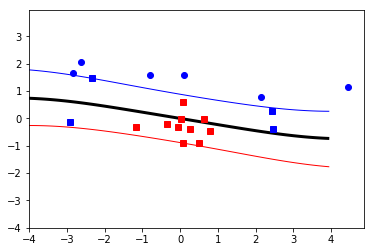

In [445]:
plotBound()